In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

In [96]:
df = pd.read_csv('US_Heart_Patients.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [97]:
df.fillna(method='ffill',inplace=True)

In [98]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [27]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [99]:
y = df['TenYearCHD']
x = df.drop(columns='TenYearCHD')

In [100]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [101]:
model = LogisticRegression()


In [103]:
model.fit(X_train,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.coef_

array([[ 0.1493551 ,  0.0177551 , -0.32297186, -0.05167481,  0.01868153,
         0.0414728 ,  0.01008996,  0.2197595 ,  0.04635486, -0.00087077,
         0.0215673 , -0.02237108, -0.05192835, -0.02575342,  0.00331593]])

In [32]:
y_prob = model.predict_proba(x_train)

In [31]:
y_pred=model.predict(x_train)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_prob=y_prob[:,1]

In [35]:
confusion_matrix(y_train,y_pred)

array([[2505,    6],
       [ 449,    8]])

In [36]:
accuracy_score(y_train,y_pred)

0.8466981132075472

In [39]:
roc_auc_score(y_train,y_prob)

0.6454026789783596

In [40]:
fpr,tpr,tresh= roc_curve(y_train,y_prob)

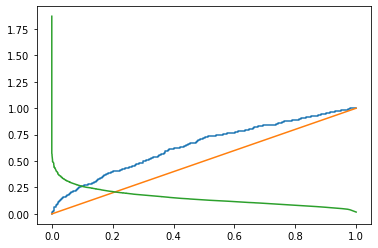

In [41]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,tresh)
plt.show()

In [ ]:
# comparing with test

In [42]:
modte = LogisticRegression()
modte.fit(x_test,y_test)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
ytest_prob = modte.predict_proba(x_test)

In [45]:
ytest_prob = ytest_prob[:,1]

In [46]:
ytest_prob

array([0.11240738, 0.0370795 , 0.18846337, ..., 0.07626122, 0.19827477,
       0.13165898])

In [48]:
ytest_pred = modte.predict(x_test)

In [49]:
confusion_matrix(y_test,ytest_pred)

array([[1078,    7],
       [ 176,   11]])

In [50]:
accuracy_score(y_test,ytest_pred)

0.8561320754716981

In [52]:
roc_auc_score(y_test,ytest_prob)

0.6842800463293822

In [54]:
fpr,tpr,tresh=roc_curve(y_test,ytest_prob)

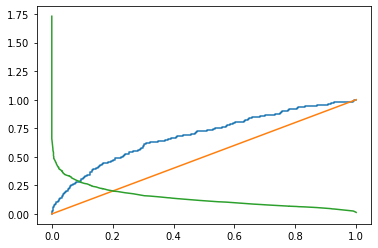

In [55]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,tresh)
plt.show()

In [3]:
import plusmodules as pm

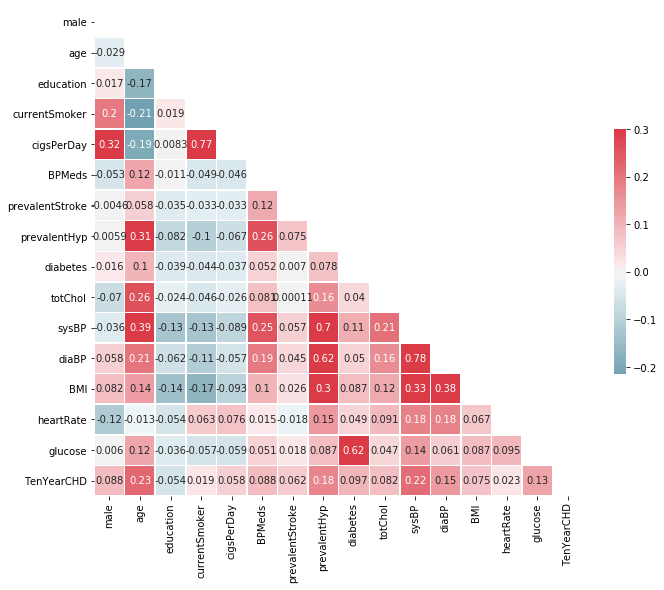

In [4]:
pm.corr_matrix(df)

In [31]:

    
rfc = LogisticRegression(solver='liblinear')

rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]
y_pred_test = rfc.predict(X_test)
y_prob_test = rfc.predict_proba(X_test)[:,1]
print('Confusion Matric-Train:', confusion_matrix(y_train, y_pred_train))
print('Confusion Matric-Test:', confusion_matrix(y_test, y_pred_test))
print('Accuracy of Random Forest-Train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of Random Forest-Test:','\n', accuracy_score(y_test, y_pred_test))
print('AUC of Random Forest-Train:', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest-Test:', roc_auc_score(y_test, y_prob_test))


Confusion Matric-Train: [[2506    5]
 [ 434   23]]
Confusion Matric-Test: [[1082    3]
 [ 176   11]]
Accuracy of Random Forest-Train: 0.852088948787062
Accuracy of Random Forest-Test: 
 0.8592767295597484
AUC of Random Forest-Train: 0.7164092871017413
AUC of Random Forest-Test: 0.7461199142413564


In [ ]:
# methods to avoid data imbalcing -- all techniques to be applied to training data
# under sampling

In [33]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [68]:
x = pd.concat([X_train,y_train],axis=1)

In [70]:
x0 = x[x['TenYearCHD']==0]
x1 =x[x['TenYearCHD']==1]


In [71]:
x0.shape

(2511, 16)

In [72]:
x1.shape

(457, 16)

In [ ]:
# for under sampling , we need to make size of 1s = size of 0s

In [47]:
x0us = x0.sample(457,random_state=1)

In [49]:
xus = pd.concat([x0us,x1])

In [51]:
xus.shape

(914, 16)

In [54]:
xus[xus['TenYearCHD']==1].shape

(457, 16)

In [55]:
xus1 = xus.drop(columns='TenYearCHD')
yus = xus['TenYearCHD']

In [56]:
xus_train,xus_test,yus_train,yus_test = train_test_split(xus1,yus,test_size=0.3,random_state=1)

In [57]:
lu1 = LogisticRegression()

In [58]:
lu1.fit(xus_train,yus_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
yus_predtrain = lu1.predict(xus_train)
yus_probtrain = lu1.predict_log_proba(xus_train)[:,1]

In [60]:
confusion_matrix(yus_train,yus_predtrain)

array([[198, 128],
       [124, 189]])

In [61]:
accuracy_score(yus_train,yus_predtrain)

0.6056338028169014

In [65]:
roc_auc_score(yus_train,yus_probtrain)

0.6602050216585977

In [63]:
yus_predtest = lu1.predict(xus_test)
yus_probtest = lu1.predict_log_proba(xus_test)[:,1]

In [64]:
accuracy_score(yus_test,yus_predtest)

0.5927272727272728

In [66]:
roc_auc_score(yus_test,yus_probtest)

0.6095207803223069

In [ ]:
# over sampling---we will make all 1s size = 0s size

In [69]:
x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4033,0,49,1.0,1,15.0,0.0,0,0,0,233.0,112.5,80.0,27.87,96.0,80.0,0
3710,1,46,3.0,1,30.0,0.0,0,1,0,154.0,141.0,90.0,22.76,65.0,65.0,0
1453,1,46,1.0,1,20.0,0.0,0,0,0,279.0,118.0,82.0,22.78,58.0,74.0,0
2425,0,63,1.0,0,0.0,0.0,0,0,0,229.0,120.0,82.0,25.58,78.0,73.0,0
1010,1,42,1.0,1,30.0,0.0,0,0,0,232.0,111.5,70.0,28.30,90.0,80.0,0
1017,1,59,3.0,0,0.0,0.0,0,0,0,236.0,127.0,83.0,26.53,57.0,86.0,0
839,0,55,1.0,0,0.0,0.0,0,0,0,244.0,133.0,80.0,25.01,75.0,70.0,0
2243,1,46,4.0,1,20.0,0.0,0,0,0,233.0,108.0,74.0,23.97,85.0,82.0,0
1342,1,57,1.0,1,20.0,0.0,0,0,0,250.0,127.5,80.0,29.38,80.0,80.0,0
192,1,61,1.0,0,0.0,0.0,0,0,0,235.0,127.0,81.0,28.63,56.0,90.0,0


In [73]:
x0

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4033,0,49,1.0,1,15.0,0.0,0,0,0,233.0,112.5,80.0,27.87,96.0,80.0,0
3710,1,46,3.0,1,30.0,0.0,0,1,0,154.0,141.0,90.0,22.76,65.0,65.0,0
1453,1,46,1.0,1,20.0,0.0,0,0,0,279.0,118.0,82.0,22.78,58.0,74.0,0
2425,0,63,1.0,0,0.0,0.0,0,0,0,229.0,120.0,82.0,25.58,78.0,73.0,0
1010,1,42,1.0,1,30.0,0.0,0,0,0,232.0,111.5,70.0,28.30,90.0,80.0,0
1017,1,59,3.0,0,0.0,0.0,0,0,0,236.0,127.0,83.0,26.53,57.0,86.0,0
839,0,55,1.0,0,0.0,0.0,0,0,0,244.0,133.0,80.0,25.01,75.0,70.0,0
2243,1,46,4.0,1,20.0,0.0,0,0,0,233.0,108.0,74.0,23.97,85.0,82.0,0
1342,1,57,1.0,1,20.0,0.0,0,0,0,250.0,127.5,80.0,29.38,80.0,80.0,0
192,1,61,1.0,0,0.0,0.0,0,0,0,235.0,127.0,81.0,28.63,56.0,90.0,0


In [74]:
x1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1760,1,48,2.0,1,17.0,0.0,0,1,0,250.0,177.0,124.0,26.40,75.0,69.0,1
3554,0,46,1.0,1,7.0,1.0,0,1,0,280.0,202.0,124.0,28.06,66.0,63.0,1
4043,1,56,1.0,1,40.0,0.0,0,0,0,296.0,111.5,74.0,23.38,80.0,71.0,1
1142,0,53,3.0,0,0.0,0.0,0,0,0,218.0,125.0,80.0,24.96,72.0,75.0,1
2633,0,43,2.0,0,0.0,0.0,0,0,0,202.0,121.5,86.5,20.82,92.0,77.0,1
448,1,38,4.0,1,10.0,0.0,0,0,0,168.0,113.0,69.5,23.68,58.0,78.0,1
3874,1,38,4.0,1,15.0,0.0,0,0,0,248.0,110.0,61.0,22.17,85.0,55.0,1
4163,1,65,4.0,1,6.0,0.0,0,0,0,236.0,118.5,77.5,24.30,52.0,65.0,1
3680,0,47,2.0,1,20.0,0.0,0,1,1,211.0,159.5,82.5,34.08,86.0,250.0,1
898,0,62,2.0,1,6.0,0.0,0,1,0,244.0,168.0,102.0,26.39,76.0,105.0,1


In [75]:
x1os = x1.sample(2511,replace=True,random_state=1)

In [78]:
xos = pd.concat([x0,x1os])

In [79]:
xos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4033,0,49,1.0,1,15.0,0.0,0,0,0,233.0,112.5,80.0,27.87,96.0,80.0,0
3710,1,46,3.0,1,30.0,0.0,0,1,0,154.0,141.0,90.0,22.76,65.0,65.0,0
1453,1,46,1.0,1,20.0,0.0,0,0,0,279.0,118.0,82.0,22.78,58.0,74.0,0
2425,0,63,1.0,0,0.0,0.0,0,0,0,229.0,120.0,82.0,25.58,78.0,73.0,0
1010,1,42,1.0,1,30.0,0.0,0,0,0,232.0,111.5,70.0,28.30,90.0,80.0,0
1017,1,59,3.0,0,0.0,0.0,0,0,0,236.0,127.0,83.0,26.53,57.0,86.0,0
839,0,55,1.0,0,0.0,0.0,0,0,0,244.0,133.0,80.0,25.01,75.0,70.0,0
2243,1,46,4.0,1,20.0,0.0,0,0,0,233.0,108.0,74.0,23.97,85.0,82.0,0
1342,1,57,1.0,1,20.0,0.0,0,0,0,250.0,127.5,80.0,29.38,80.0,80.0,0
192,1,61,1.0,0,0.0,0.0,0,0,0,235.0,127.0,81.0,28.63,56.0,90.0,0


In [80]:
x0 = xos[xos['TenYearCHD']==0]
x1 =xos[xos['TenYearCHD']==1]

In [82]:
xos1 = xos.drop(columns='TenYearCHD')
yos = xos['TenYearCHD']

In [83]:
xos_train,xos_test,yos_train,yos_test = train_test_split(xos1,yos,test_size=0.3,random_state=1)

In [84]:
lu2 = LogisticRegression()

In [86]:
lu2.fit(xos_train,yos_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
yos_predtrain = lu2.predict(xos_train)
yos_probtrain = lu2.predict_log_proba(xos_train)[:,1]

In [88]:
accuracy_score(yos_train,yos_predtrain)

0.62475106685633

In [89]:
roc_auc_score(yos_train,yos_probtrain)

0.678522009341044

In [90]:
lu2.fit(xos_test,yos_test)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
yus_predtest = lu2.predict(xos_test)
yus_probtest = lu2.predict_log_proba(xos_test)[:,1]

In [92]:
accuracy_score(yos_test,yus_predtest)

0.6237558062375581

In [93]:
roc_auc_score(yos_test,yus_probtest)

0.675708573341084

In [ ]:
# over samlping is fine

In [ ]:
# data balancing using SMOTE

In [105]:
from imblearn.over_sampling import SMOTE

In [107]:
smote = SMOTE(sampling_strategy='minority',random_state=1)
xsm_train,ysm_train = smote.fit_sample(X_train,y_train)

In [108]:
len(xsm_train)

5022

In [109]:
len(ysm_train)

5022